# A3 - K-mean and DBSCAN clustering
### Martin Hansson

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings

warnings.filterwarnings('ignore')


# Question 1

In [ ]:
%matplotlib inline

## 1a
A scatter plot of the data w.r.t. phi and psi are shown in figure 1.

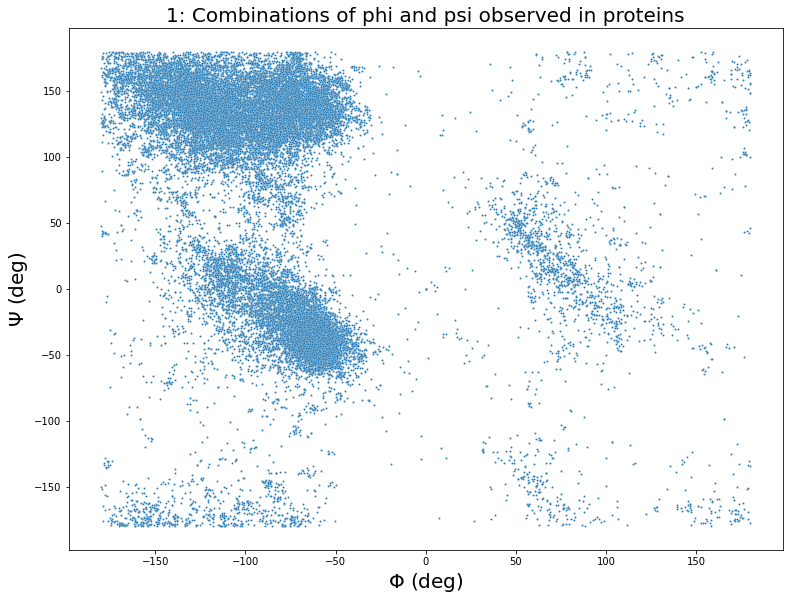

In [ ]:
#Reding data



data = pd.read_csv("data_all.csv") #reading data
plt.figure(1,[2*6.4, 2*4.8]);
sns.scatterplot(x=data['phi'],y=data['psi'],s=4)
plt.xlabel(r'$\Phi$ (deg)',fontsize=20);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=20);
h=1
plt.title(str(h)+': Combinations of phi and psi observed in proteins',fontsize=20);

## 1b
A heatmap plot of the data w.r.t. phi and psi are shown figure 2.

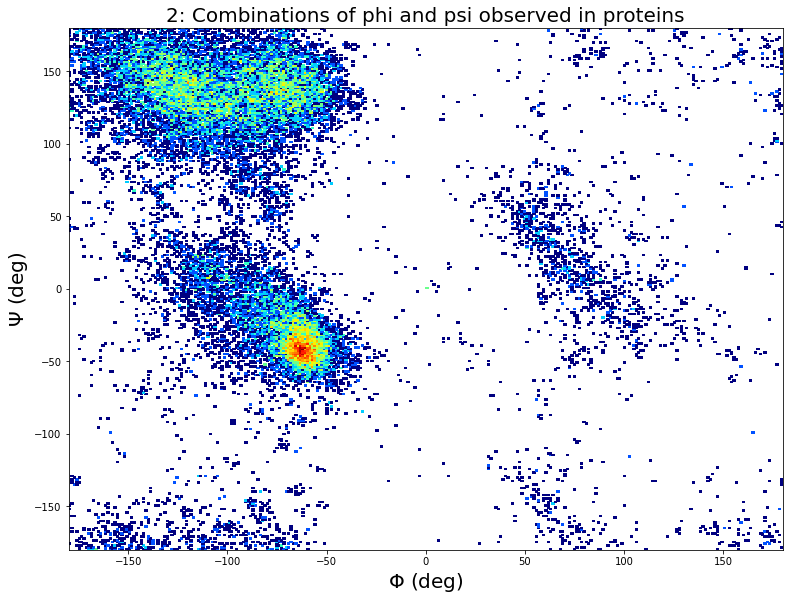

In [ ]:
# Heat map
plt.figure(1,[2*6.4, 2*4.8]);
plt.hist2d(x=data['phi'],y=data['psi'], bins= 300, cmap='jet', norm = colors.LogNorm())
plt.xlabel(r'$\Phi$ (deg)',fontsize=20);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=20);
h+=1
plt.title(str(h)+': Combinations of phi and psi observed in proteins',fontsize=20);
plt.show()

# Question 2

## 2a
In figure 3 and figure 4, the cluster formations and sum squared distance for different K-values are shown. 
Based on the sum squared distance-plot, K=3 is selected as an appropriate value due to the elbow at that point (even though it is not a very clear elbow). 
The performance increases substantially when K increases so other K-values would had also been suitable to choose in this case (for example K=7).

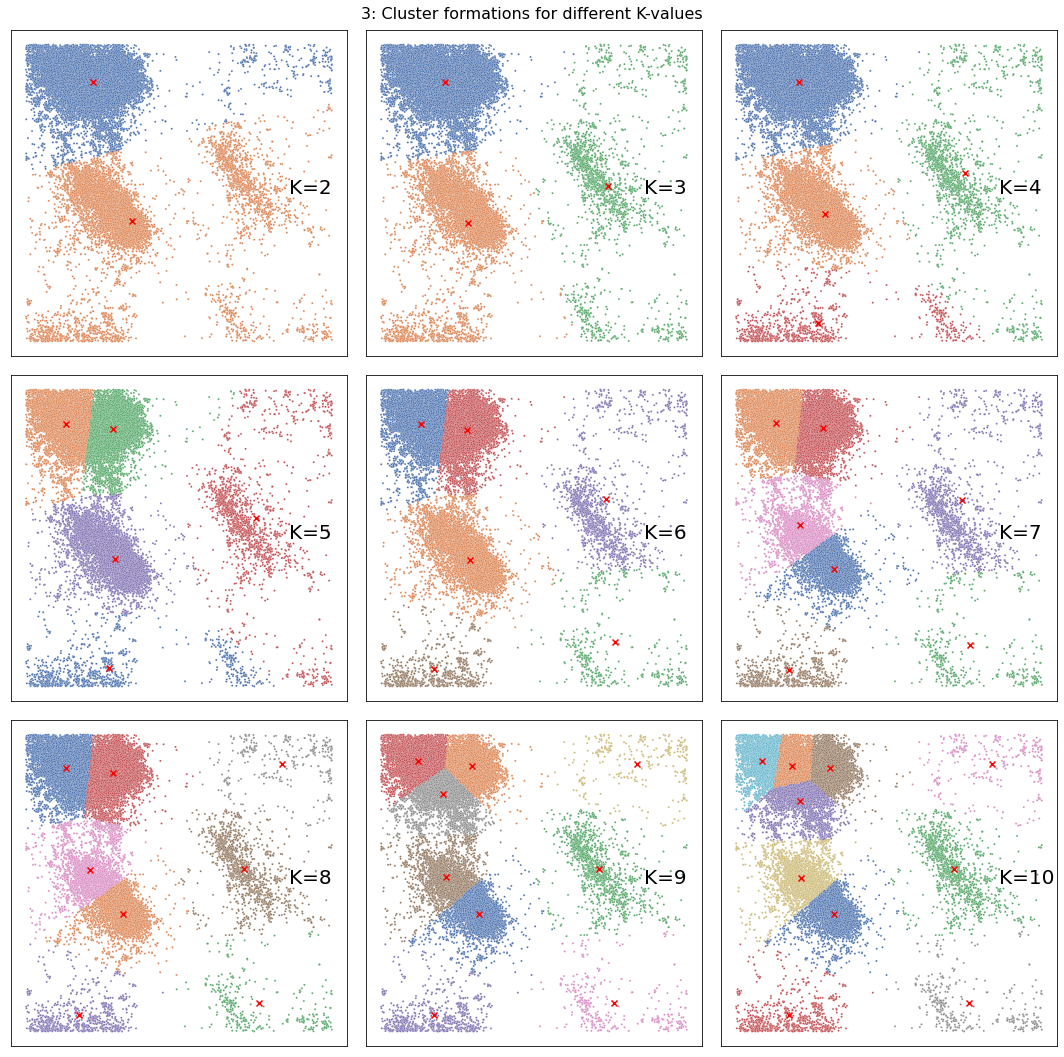

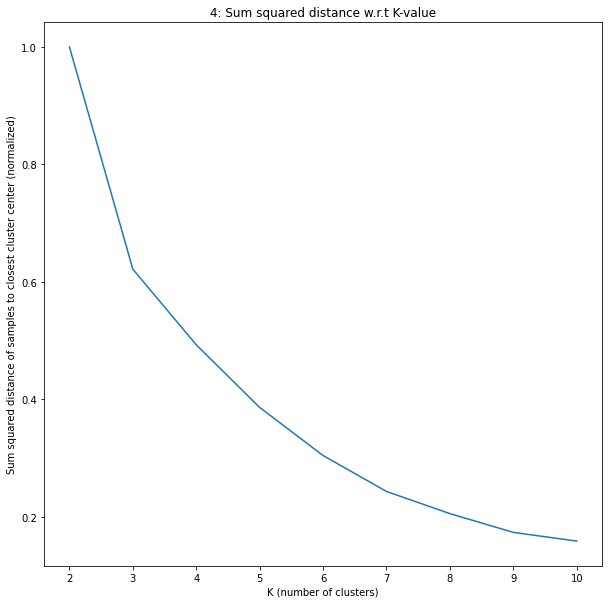

In [ ]:
row=3
col=3
i0=2

fig, axs = plt.subplots(row, col,sharex='all',sharey='all',figsize=(15,15))
plt.xlabel('')
plt.ylabel('')    
plt.xticks([])
plt.yticks([])
h+=1
fig.suptitle(str(h)+': Cluster formations for different K-values', fontsize=16,va='top')
plt.tight_layout(pad=1.5)
Distance=np.zeros(row*col)
i=i0
for row_i in range(0,row):
    for col_i in range(0,col):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data.filter(['phi','psi']))
        data['cluster']=kmeans.labels_ 
        Distance[i-2]=kmeans.inertia_
        sns.scatterplot(x=data['phi'],y=data['psi'],hue=data['cluster'],s=4,palette='deep',ax=axs[row_i,col_i],legend=False)
        axs[row_i,col_i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
        axs[row_i,col_i].text(130,0,'K='+str(i),fontsize=20)
        i+=1

plt.figure(2,figsize=(10,10))
plt.plot(range(i0,i0+row*col),Distance/np.max(Distance))
plt.ylabel('Sum squared distance of samples to closest cluster center (normalized)');
plt.xlabel('K (number of clusters)');
h+=1
plt.title(str(h)+': Sum squared distance w.r.t K-value');

## 2b
First, it is checked if the cluster changes if the starting position changes for the cluster centers. 
This is done by changing trying out 6 different _random states_ in the kmeans()-function. 
The results show that the model converges to the same results independently of the starting positions.

Second, different propotions of randomly data points are removed. Even with 70% removed, the cluster centers do not significitnly move.

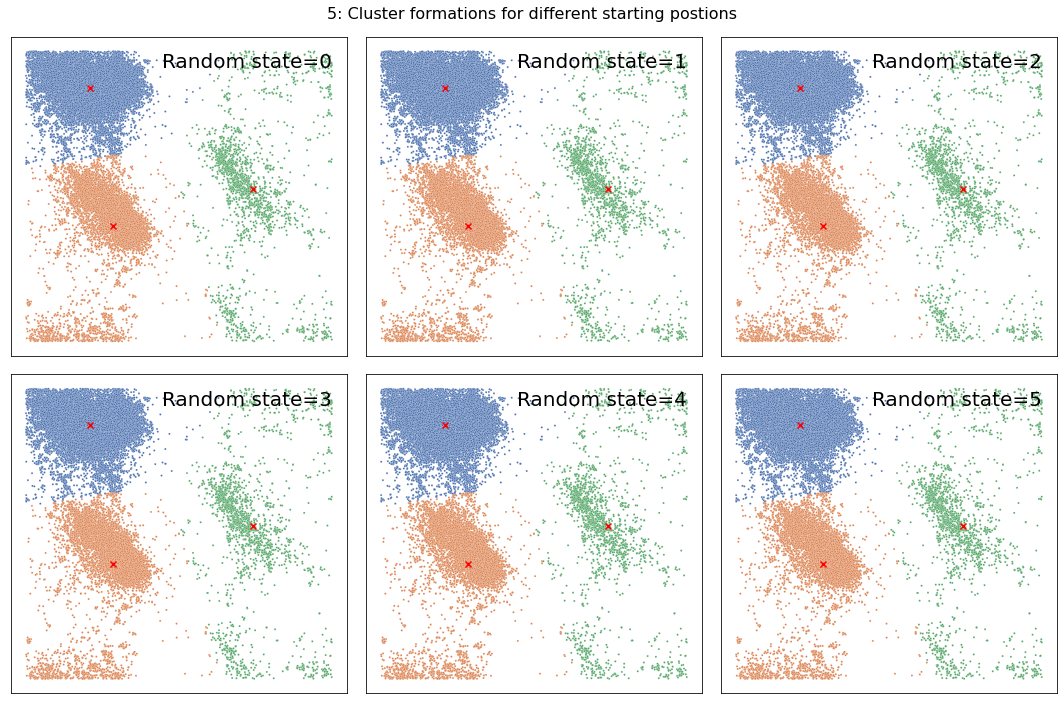

In [ ]:
row=2
col=3
i0=0

fig, axs = plt.subplots(row, col,sharex='all',sharey='all',figsize=(15,10))
plt.xlabel('')
plt.ylabel('')    
plt.xticks([])
plt.yticks([])
h+=1
fig.suptitle(str(h)+': Cluster formations for different starting postions', fontsize=16,va='top')
plt.tight_layout(pad=1.5)
i=i0
for row_i in range(0,row):
    for col_i in range(0,col):
        kmeans = KMeans(n_clusters=3, random_state=1).fit(data.filter(['phi','psi']))
        data['cluster']=kmeans.labels_ 
        sns.scatterplot(x=data['phi'],y=data['psi'],hue=data['cluster'],s=4,palette='deep',ax=axs[row_i,col_i],legend=False)
        axs[row_i,col_i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
        axs[row_i,col_i].text(-20,160,'Random state='+str(i),fontsize=20,)
        i+=1

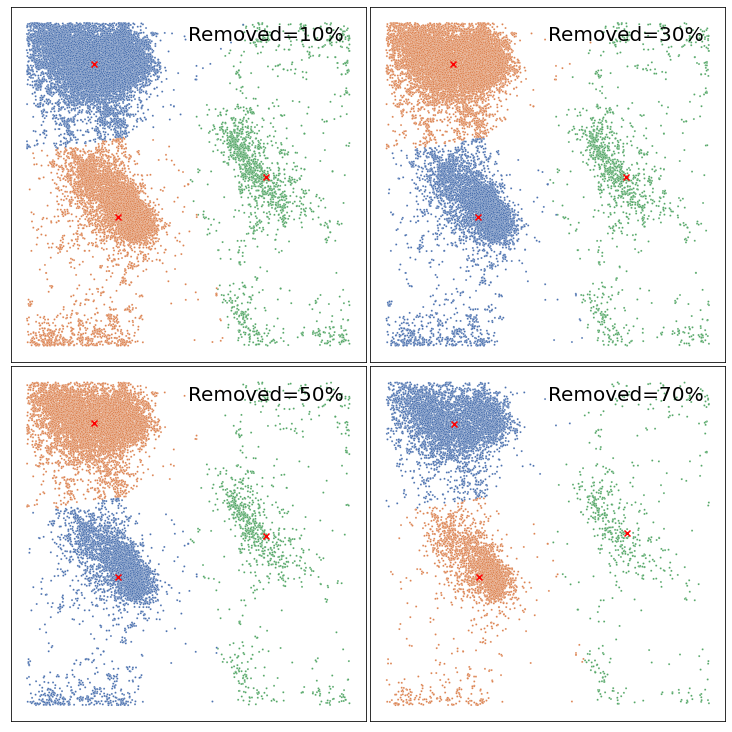

In [ ]:
row=2
col=2
i0=.1
fig2, axs2 = plt.subplots(row, col,sharex='all',sharey='all',figsize=(10,10))
plt.xlabel('')
plt.ylabel('')    
plt.xticks([])
plt.yticks([])
plt.tight_layout(pad=.1)
i=i0
for row_i in range(0,row):
    for col_i in range(0,col):       
        remove_n = round((i*len(data['phi'])))
        drop_indices = np.random.choice(data.index, remove_n, replace=False)
        data_sub = data.drop(drop_indices)
        kmeans = KMeans(n_clusters=3, random_state=1).fit(data_sub.filter(['phi','psi']))
        data_sub['cluster']=kmeans.labels_ 
        sns.scatterplot(x=data_sub['phi'],y=data_sub['psi'],hue=data_sub['cluster'],s=4,palette='deep',ax=axs2[row_i,col_i],legend=False)
        axs2[row_i,col_i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
        axs2[row_i,col_i].text(0,160,'Removed='+str(round(i*100))+'%',fontsize=20,)
        i+=.2

## 2c
Given that the lower (psi=-180) and upper (psi=180) boundary are the same line in reality, the cluster are unreasonable. 
The algorithm does not take this into account. Else, the data points in the lower left corner would belong to the same cluster as the upper left data points.

Also the large amount of outliers included in the clusters could also be considered to be unreasonable.

## 2d

Due to a periodization of 360 deg (i.e. 180 deg = -180 deg) for both phi and psi, it can be seen that the data points in the 
lower left corner of the scatter plot are connected to data points in the other corners. It would be beneficial to have the 
limits along lines where no or very few point are located which basically corresponds to unallowed angles in the protein chain. 
By translating phi by 180 degrees 
(i.e. phi.new=[0-360]) and psi by 90 degrees (phi.new=[(-90)-270]), all major connected clusters will be connected also 
in the domain subjected to clustering by the algorithm. The resulting scatter plot are shown in figure 6. The cluster formations for different k-values
are shown figure 7 and the sum square distance for each _k_ in figure 8. 

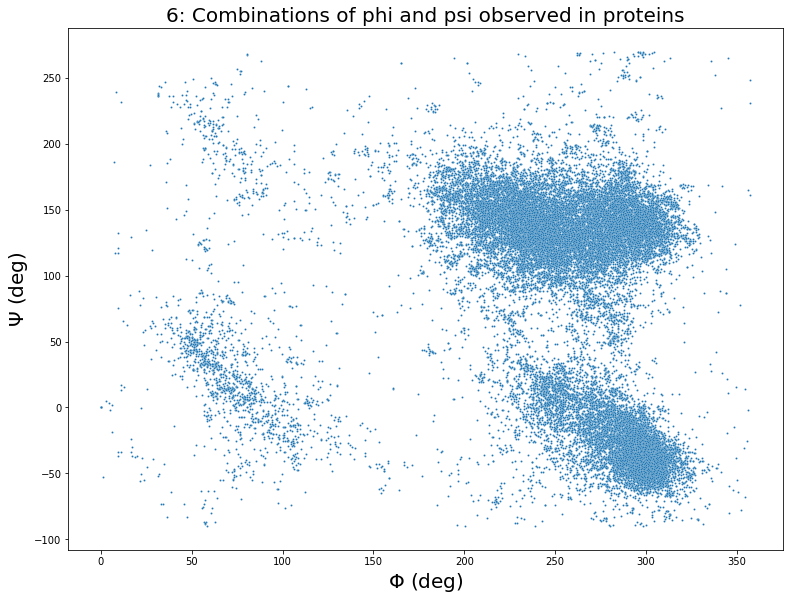

In [ ]:
d_phi=180
d_psi=90
data['d_phi']=(data['phi']+(180-d_phi))%360-(180-d_phi)
data['d_psi']=(data['psi']+(180-d_psi))%360-(180-d_psi)

plt.figure(1,[2*6.4, 2*4.8]);
sns.scatterplot(x=data['d_phi'],y=data['d_psi'],s=4)
plt.xlabel(r'$\Phi$ (deg)',fontsize=20);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=20);
h+=1
plt.title(str(h)+': Combinations of phi and psi observed in proteins',fontsize=20);


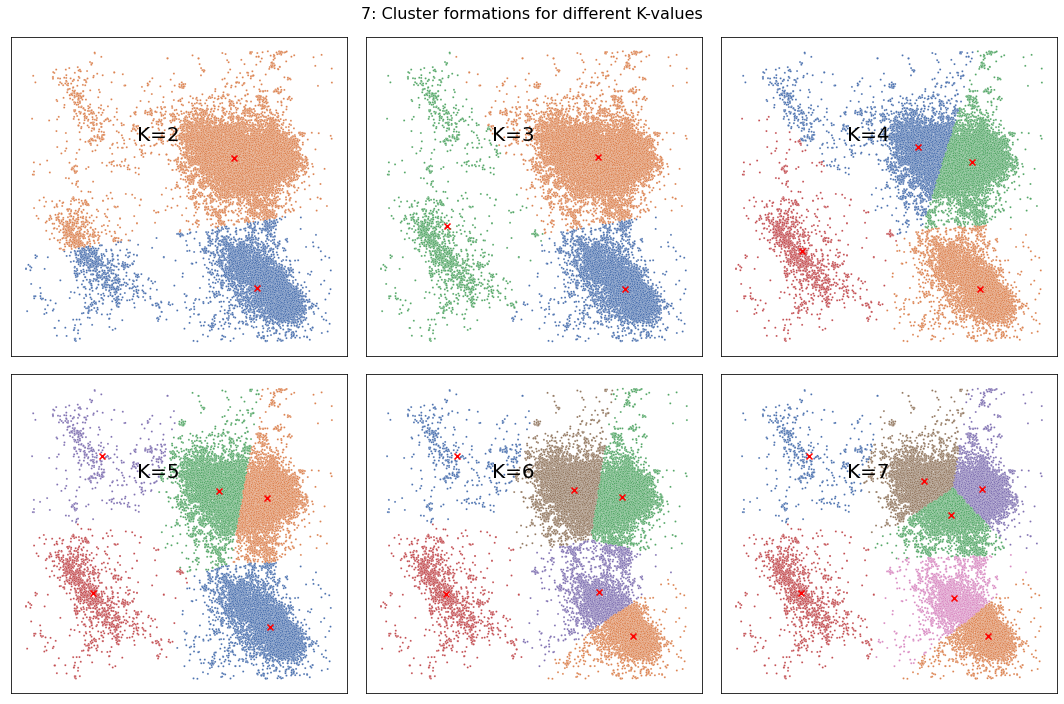

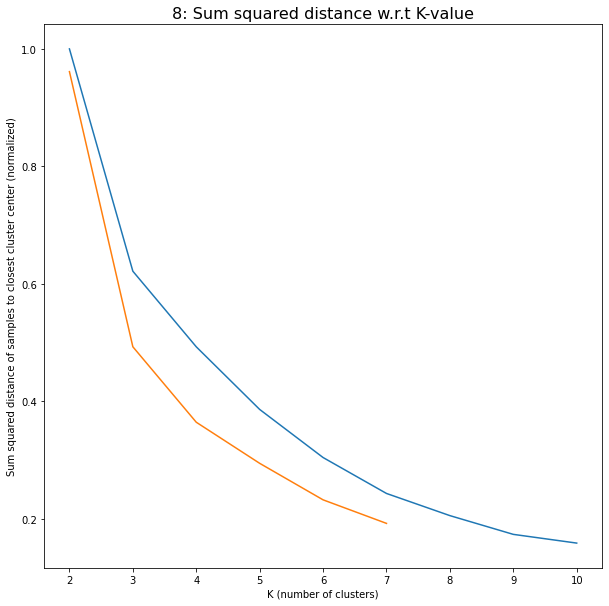

In [ ]:
row=2
col=3
i0=2

fig, axs = plt.subplots(row, col,sharex='all',sharey='all',figsize=(15,10))
plt.xlabel('')
plt.ylabel('')    
plt.xticks([])
plt.yticks([])
h+=1
fig.suptitle(str(h)+': Cluster formations for different K-values', fontsize=16,va='top')
plt.tight_layout(pad=1.5)
Distance2=np.zeros(row*col)
i=i0
for row_i in range(0,row):
    for col_i in range(0,col):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data.filter(['d_phi','d_psi']))
        data['cluster']=kmeans.labels_ 
        Distance2[i-2]=kmeans.inertia_
        sns.scatterplot(x=data['d_phi'],y=data['d_psi'],hue=data['cluster'],s=4,palette='deep',ax=axs[row_i,col_i],legend=False)
        axs[row_i,col_i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
        axs[row_i,col_i].text(130,160,'K='+str(i),fontsize=20)
        i+=1

plt.figure(3,figsize=(10,10))
plt.plot(range(2,11),Distance/np.max(Distance))
plt.plot(range(i0,i0+row*col),Distance2/np.max(Distance))
plt.ylabel('Sum squared distance of samples to closest cluster center (normalized)');
plt.xlabel('K (number of clusters)')
h+=1
plt.title(str(h)+': Sum squared distance w.r.t K-value', fontsize=16);

# Question 3
For Question 3 and Question 4, the translation discribed in Question 2d has been adopted, since this is a more reasonable domain to cluster the given data.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings

warnings.filterwarnings('ignore')

## 3a
The average _Silhouette Coefficient_ of all samples has been chosen to quantify the performance (_eps_ and _ms_) of the model. 2 steps has been used to choose
the parameters in the model. First, the _Silhouette Coefficient_ different parameter values (_eps_ = [1-20] and _ms_ = [20-200]) using a course grid to find 
approximate values (where _Silhouette Coefficient_ is highest), see figure 9. Second, the same process are repeated with a finer grid to determine the final parameter values, see figure 10.
The highest average _Silhouette Coefficient_ were found at _ms_ = 160 points and _eps_ = 16 degrees but to get a more robust
solution _ms_ = 170 points and _eps_ = 15 degrees were chosen with some minor cost of performance.

### Coarse grid

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

d_phi=180
d_psi=90
#Reding data
data = pd.read_csv("data_all.csv") #reading data
data['d_phi']=(data['phi']+(180-d_phi))%360-(180-d_phi)
data['d_psi']=(data['psi']+(180-d_psi))%360-(180-d_psi)
X=data.filter(['d_phi','d_psi'])

e_val=np.array([1,5,10,15,20])
ms_val=np.array([10,50,100,150,200])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1

   




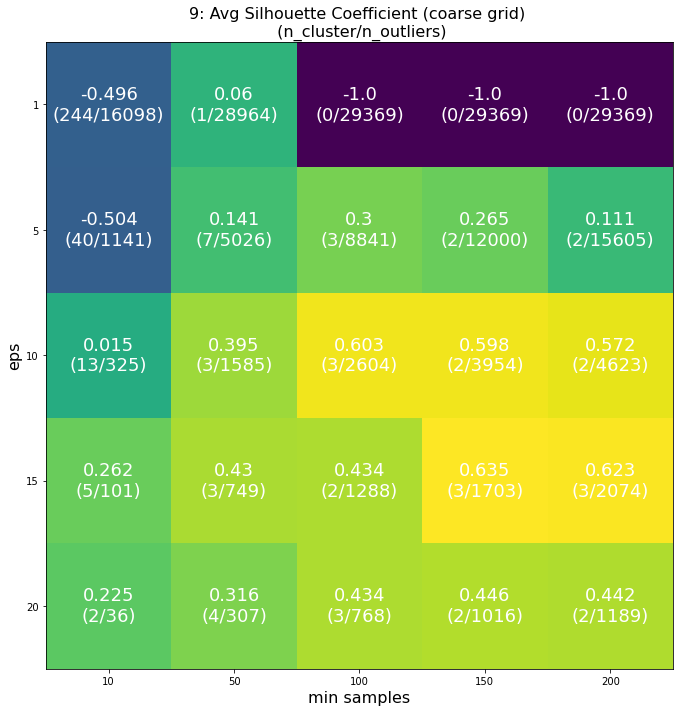

In [ ]:
#PLOTTING HEATMAP
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=18)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient (coarse grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

### Fine grid

In [ ]:
e_val=np.array([13,14,15,16,17])
ms_val=np.array([140,150,160,170,180,190])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1

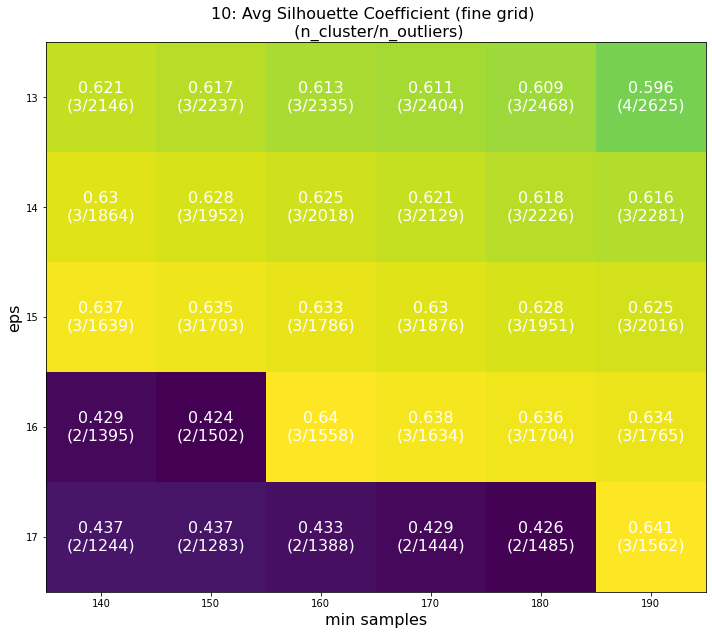

In [ ]:
#PLOTTING HEATMAP
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=16)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient (fine grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

## 3b
Figure 11 shows the resulting clusters with 1876 outliers. GLY and SER are the most frequent outliers, see figure 12.

Number of outliers:1876


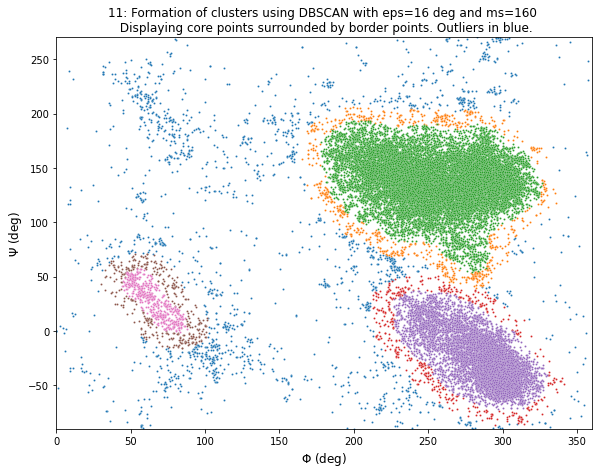

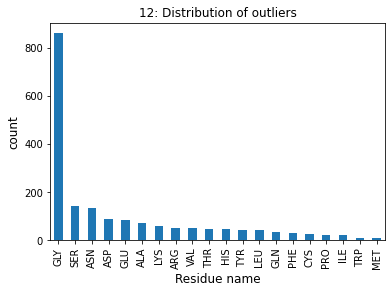

In [ ]:
db = DBSCAN(eps=15, min_samples=170).fit(X)
data['core']=0
labels = db.labels_
data['label']=labels
ind=db.core_sample_indices_
data.loc[ind,'core']=1
A_ol=data[(data['core']==0)&(data['label']==-1)]

plt.figure(3,[1.5*6.4, 1.5*4.8])
sns.scatterplot(x=A_ol['d_phi'],y=A_ol['d_psi'],s=4)
plt.xlim(0,360)
plt.ylim(-90,270)
plt.xlabel(r'$\Phi$ (deg)',fontsize=12);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=12);
h+=1
plt.title(str(h)+': Formation of clusters using DBSCAN with eps=16 deg and ms=160 \n Displaying core points surrounded by border points. Outliers in blue.',fontsize=12);
for i in range(np.max(labels)+1):
    A_bound=data[(data['core']==0)&(data['label']==i)]
    A_core=data[(data['core']==1)&(data['label']==i)]
    sns.scatterplot(x=A_bound['d_phi'],y=A_bound['d_psi'],s=4)
    sns.scatterplot(x=A_core['d_phi'],y=A_core['d_psi'],s=4)
    
plt.figure(4)
plt.xlabel('Residue name',fontsize=12);    
plt.ylabel('count',fontsize=12);
h+=1
plt.title(str(h)+': Distribution of outliers',fontsize=12);
A_ol['residue name'].value_counts().plot(kind='bar')
print('Number of outliers:'+str(len(A_ol['residue name'])))

## 3c

- K_means are always using all data points (unless removed manually). DBSCAN are excluding outliers. This makes DBSCAN more efficient for noisy data sets.
- K means cluster have convex shape where as DBSCAN clusters can have arbitrary form.
- An advantage with DBSCAN is that the number of clusters does not need to be determined. However, having only one model parameter, 
K means could be considered to be more user friendly.

## 3d
Looking at the heatmap plot in Q3a, it can be seen that a small change in any parameter value could change the results dramatiacally
(i.e. changing the number of clusters). This is however, depended on the current solution. For example, _eps_ = 16 and _ms_ = 160 would
be solution on the border line going from 3 to 2 clusters (and substanitially reducing the _Silhouette Coefficient_) by small change in either _eps_ or _ms_.

# Question 4

## 4a
Using the same approach as in 3a we get _ms_ = 14 and _eps_ = 14 for PRO, see figure 13 and 14. 
It can be seen that PRO is only belongs to 2 of the clusters found for the general data, see figure 15.

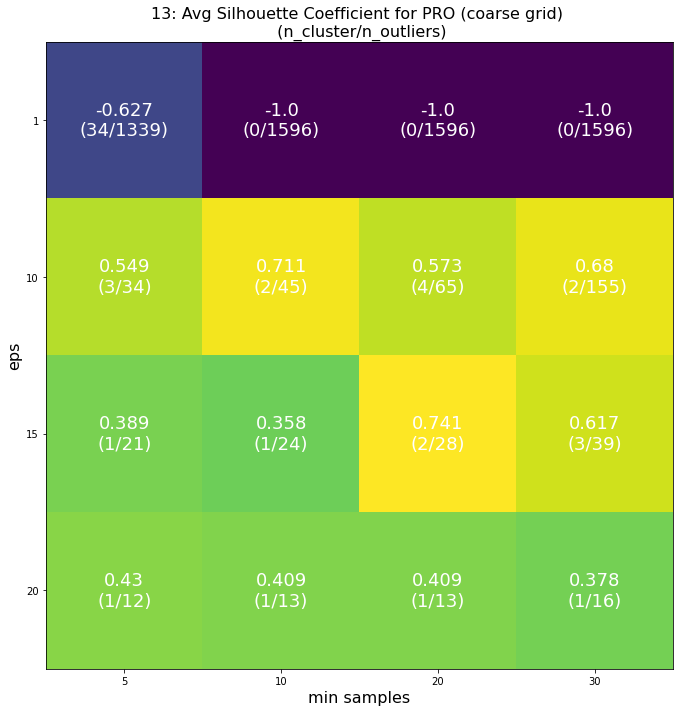

In [ ]:
d_phi=180
d_psi=90
#Reding data
data = pd.read_csv("data_all.csv") #reading data
data=data[(data['residue name']=='PRO')]
data['d_phi']=(data['phi']+(180-d_phi))%360-(180-d_phi)
data['d_psi']=(data['psi']+(180-d_psi))%360-(180-d_psi)
X=data.filter(['d_phi','d_psi'])

e_val=np.array([1,10,15,20])
ms_val=np.array([5,10,20,30])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1



fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=18)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient for PRO (coarse grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

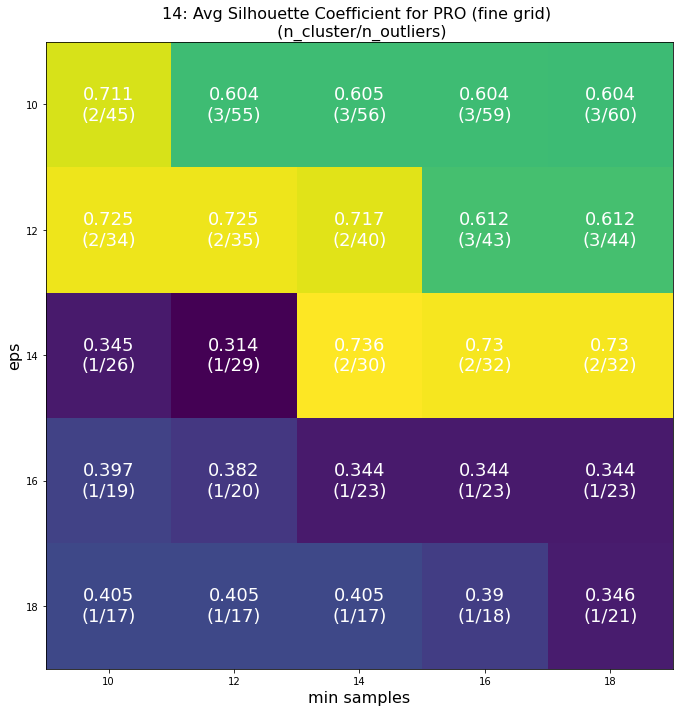

In [ ]:
e_val=np.array([10,12,14,16,18])
ms_val=np.array([10,12,14,16,18])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1



fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=18)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient for PRO (fine grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

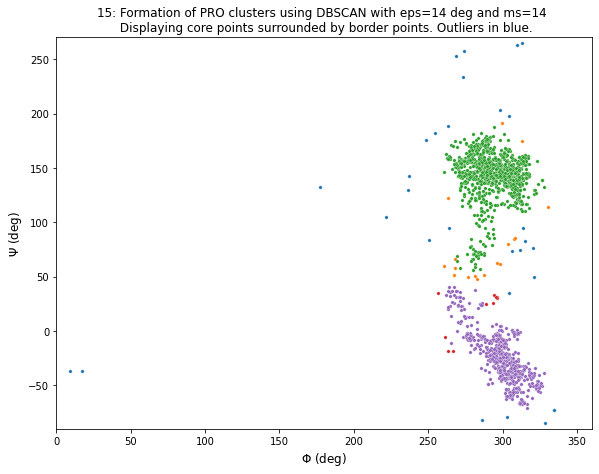

In [ ]:
db = DBSCAN(eps=14, min_samples=14).fit(X)
data['core']=0
labels = db.labels_
data['label']=labels
data = data.reset_index(drop=True)
ind=db.core_sample_indices_
data.loc[ind,'core']=1
A_ol=data[(data['core']==0)&(data['label']==-1)]

plt.figure(3,[1.5*6.4, 1.5*4.8])
sns.scatterplot(x=A_ol['d_phi'],y=A_ol['d_psi'],s=12)
plt.xlim(0,360)
plt.ylim(-90,270)
plt.xlabel(r'$\Phi$ (deg)',fontsize=12);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=12);
h+=1
plt.title(str(h)+': Formation of PRO clusters using DBSCAN with eps=14 deg and ms=14 \n Displaying core points surrounded by border points. Outliers in blue.',fontsize=12);
for i in range(np.max(labels)+1):
    A_bound=data[(data['core']==0)&(data['label']==i)]
    A_core=data[(data['core']==1)&(data['label']==i)]
    sns.scatterplot(x=A_bound['d_phi'],y=A_bound['d_psi'],s=12)
    sns.scatterplot(x=A_core['d_phi'],y=A_core['d_psi'],s=12)
    


## 4b
Using the same approach as in 3a we get _ms_ = 30 and _eps_ = 38 for GLY, see figure 16 and 17. 
It can be seen that GLY not only belongs to all 3 clusters found for the general data, 
but also can be found in the many of outliers found for the general data (which was shown in Q3b bar chart). With the chosen parameters, many of these former outliers now 
belongs to a GLY-cluster, see figure 18.

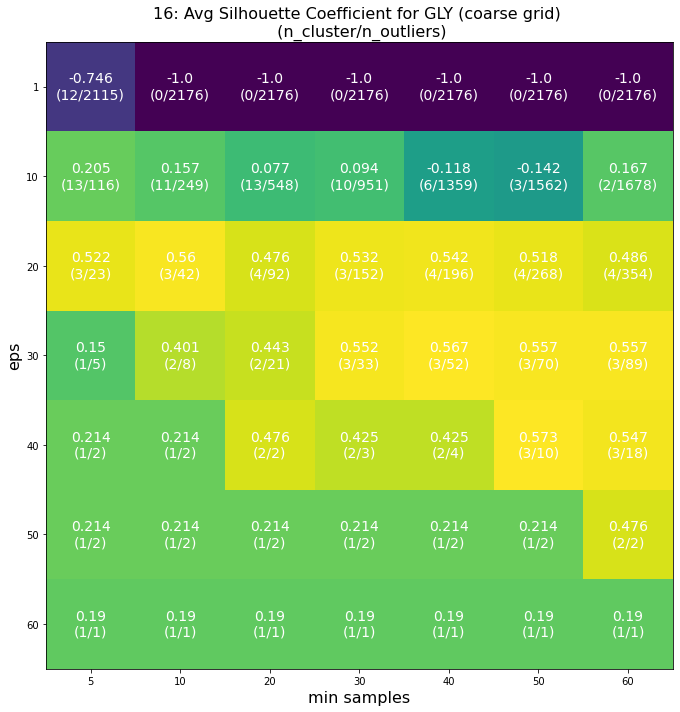

In [ ]:
d_phi=180
d_psi=90
#Reding data
data = pd.read_csv("data_all.csv") #reading data
data=data[(data['residue name']=='GLY')]
data['d_phi']=(data['phi']+(180-d_phi))%360-(180-d_phi)
data['d_psi']=(data['psi']+(180-d_psi))%360-(180-d_psi)
X=data.filter(['d_phi','d_psi'])

e_val=np.array([1,10,20,30,40,50,60])
ms_val=np.array([5,10,20,30,40,50,60])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1



fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=14)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient for GLY (coarse grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

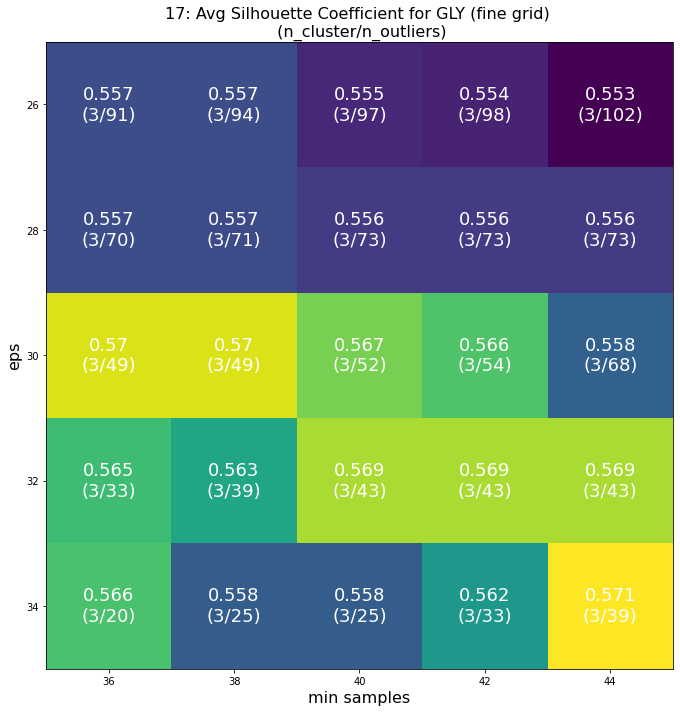

In [ ]:
e_val=np.array([26,28,30,32,34])
ms_val=np.array([36,38,40,42,44])
e2d=np.zeros((len(e_val),len(ms_val)))
ms2d=np.zeros((len(e_val),len(ms_val)))
sil2d=-np.ones((len(e_val),len(ms_val)))
nc=np.zeros((len(e_val),len(ms_val)))
nol=-np.ones((len(e_val),len(ms_val)))

i=0
for e in e_val:
   j=0
   for ms in ms_val:
       db = DBSCAN(eps=e, min_samples=ms).fit(X)
       labels = db.labels_
       e2d[i][j]=e
       ms2d[i][j]=ms
       nol[i][j]=np.count_nonzero(labels<0)
       if np.max(labels)>-1:
           sil2d[i][j]=silhouette_score(X, labels)
           nc[i][j]=np.max(labels)+1         
       j+=1
   i+=1



fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sil2d)

ax.set_xticks(np.arange(len(ms_val)))
ax.set_yticks(np.arange(len(e_val)))
# ... and label them with the respective list entries
ax.set_xticklabels(ms_val)
ax.set_yticklabels(e_val)
# Loop over data dimensions and create text annotations.
for i in range(len(e_val)):
    for j in range(len(ms_val)):
        text = ax.text(j, i, str(round(sil2d[i, j],3))+'\n('+str(round(nc[i][j]))+'/'+str(round(nol[i][j]))+')',ha="center", va="center", color="w",fontsize=18)
h+=1
ax.set_title(str(h)+': Avg Silhouette Coefficient for GLY (fine grid) \n (n_cluster/n_outliers)',fontsize=16)
ax.set_ylabel("eps",fontsize=16)
ax.set_xlabel("min samples",fontsize=16)
fig.tight_layout()
plt.show()

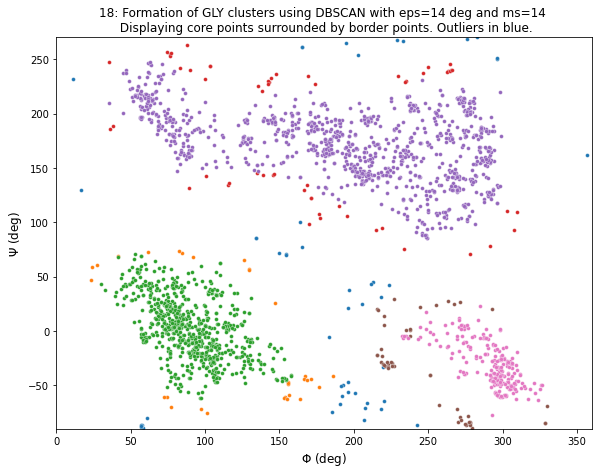

In [ ]:
db = DBSCAN(eps=30, min_samples=38).fit(X)
data['core']=0
labels = db.labels_
data['label']=labels
data = data.reset_index(drop=True)
ind=db.core_sample_indices_
data.loc[ind,'core']=1
A_ol=data[(data['core']==0)&(data['label']==-1)]

plt.figure(3,[1.5*6.4, 1.5*4.8])
sns.scatterplot(x=A_ol['d_phi'],y=A_ol['d_psi'],s=15)
plt.xlim(0,360)
plt.ylim(-90,270)
plt.xlabel(r'$\Phi$ (deg)',fontsize=12);    
plt.ylabel(r'$\Psi$ (deg)',fontsize=12);
h+=1
plt.title(str(h)+': Formation of GLY clusters using DBSCAN with eps=14 deg and ms=14 \n Displaying core points surrounded by border points. Outliers in blue.',fontsize=12);
for i in range(np.max(labels)+1):
    A_bound=data[(data['core']==0)&(data['label']==i)]
    A_core=data[(data['core']==1)&(data['label']==i)]
    sns.scatterplot(x=A_bound['d_phi'],y=A_bound['d_psi'],s=15)
    sns.scatterplot(x=A_core['d_phi'],y=A_core['d_psi'],s=15)